# Visualizations Compilation Draft

## Purpose of this notebook

- this notebook contains the visualizations to be included in the final data story

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly_express as px
import seaborn as sns
import math

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

In [2]:
regional_comp_df=pd.read_csv('../data/exported_subset_data/for_visualizations/regional_comp_long.csv')
hap_comp_df=pd.read_csv('../data/exported_subset_data/for_visualizations/hap_variables.csv')
df19_complete=pd.read_csv('../data/exported_subset_data/for_visualizations/geo_graph_data.csv')

denmark_df_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_denmark.csv')
finland_df_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_finland.csv')
india_df_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_india.csv')
ushap_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_us.csv')
mexico_df_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_mexico.csv')
china_df_daily= pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_china.csv')
sa_df_daily=pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_saudi_arabia.csv')
malaysia_df_daily=pd.read_csv('../data/exported_subset_data/happiness_2020/interpolated_malaysia.csv')

denmark_cov= pd.read_csv('../data/exported_subset_data/covid/covid_denmark.csv')
finland_cov= pd.read_csv('../data/exported_subset_data/covid/covid_finland.csv')
india_cov= pd.read_csv('../data/exported_subset_data/covid/covid_india.csv')
us_cov=pd.read_csv('../data/exported_subset_data/covid/covid_us.csv')
mexico_cov=pd.read_csv('../data/exported_subset_data/covid/covid_mexico.csv')
china_cov=pd.read_csv('../data/exported_subset_data/covid/covid_china.csv')
sa_cov=pd.read_csv('../data/exported_subset_data/covid/covid_saudi_arabia.csv')
malaysia_cov=pd.read_csv('../data/exported_subset_data/covid/covid_malaysia.csv')

In [3]:
fig = px.choropleth(data_frame = df19_complete,
                    locations= 'iso_alpha',
                    color= 'happiness_rating',  
                    hover_name= 'country',
                    hover_data={'iso_alpha':False},
                    labels= {'happiness_rating':'happiness rating'},
                    color_continuous_scale= 'RdYlBu'
                    )
fig.update_layout(title={'text':'Happiness Ratings in 2019', 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'}, 
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Helvetica'))
fig.show()

## Regional and longitudinal comparison 2006-2019

Text(0.5, 1.12, 'Happiness rating by region from 2006 to 2019')

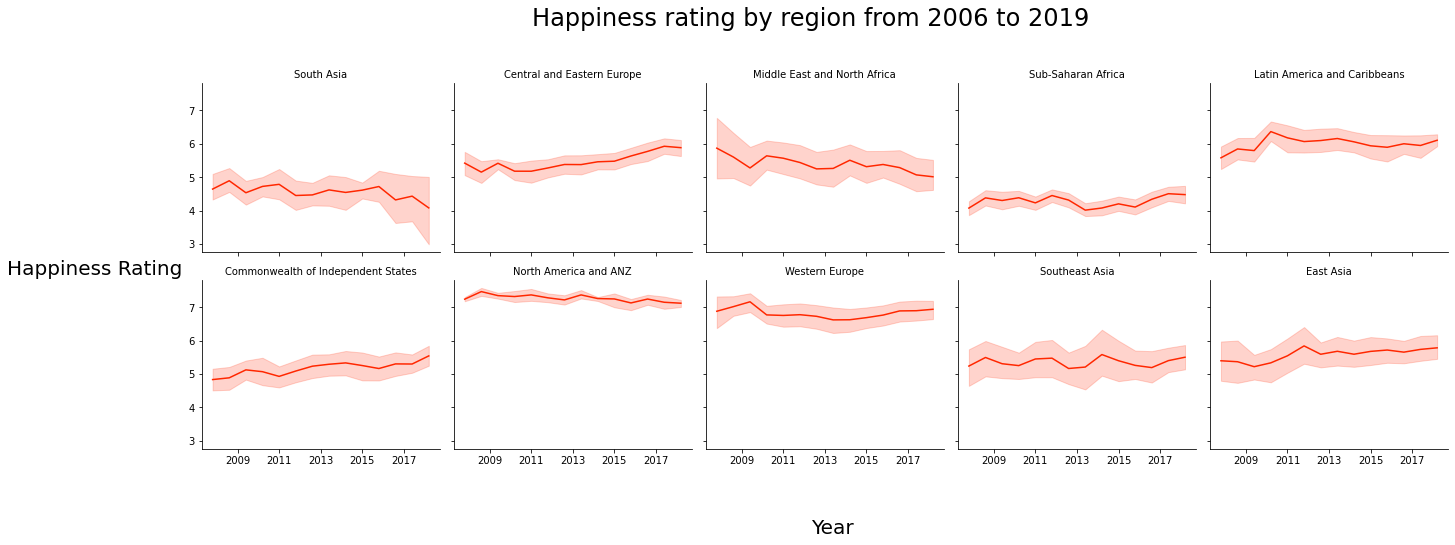

In [4]:
## small multiples plot of the different regions showing longitudinal happiness ratings from 2006 to 2019
grid_layout = sns.FacetGrid(regional_comp_df
                            ,col = 'region'
                            ,col_wrap = 5
                            ,aspect = 1.2
                            )
grid_layout.map(sns.lineplot, 'year','happiness_rating' ,color ='#FF2700')
grid_layout.set_titles('{col_name}')
for ax in grid_layout.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
for ax in grid_layout.axes:
    x_labels= ['2007','2009','2011','2013','2015','2017','2019']
    ax.set_xticklabels(x_labels)
grid_layout.fig.text(0.5, -.1,'Year', fontsize=20) 
grid_layout.fig.text(-0.12, .5,'Happiness Rating', fontsize=20) 
grid_layout.fig.suptitle('Happiness rating by region from 2006 to 2019'
                         ,y = 1.12
                         ,fontsize = 24
                         )


## Variables correlating to happiness

<AxesSubplot:xlabel='life_expectancy', ylabel='happiness_rating'>

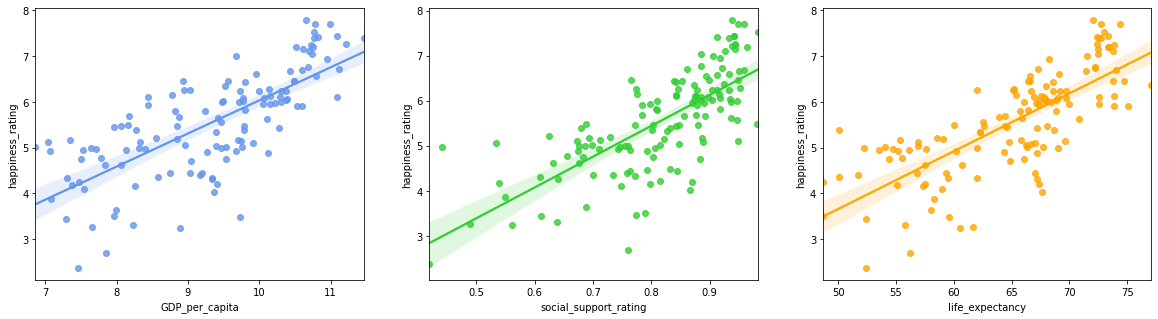

In [5]:
## 2019
row_filter_2019=hap_comp_df['year']==2019
rf19_df=hap_comp_df[row_filter_2019]
plt.rcParams['figure.figsize'] = [20,5]
fig, axs = plt.subplots(ncols=3)
sns.regplot(x='GDP_per_capita', y='happiness_rating', data=rf19_df, ax=axs[0], color='cornflowerblue')
sns.regplot(x='social_support_rating', y='happiness_rating', data=rf19_df, ax=axs[1], color='limegreen')
sns.regplot(x='life_expectancy',y='happiness_rating', data=rf19_df, ax=axs[2], color='orange')



In [6]:
agg_df=hap_comp_df.groupby('country')[['happiness_rating','GDP_per_capita','social_support_rating','life_expectancy','democratic_quality','delivery_quality','corruption_perceptions','positive_affect','negative_affect']].mean()


In [7]:
agg_df.to_csv('../data/exported_subset_data/for_visualizations/variables.csv')

<AxesSubplot:xlabel='delivery_quality', ylabel='happiness_rating'>

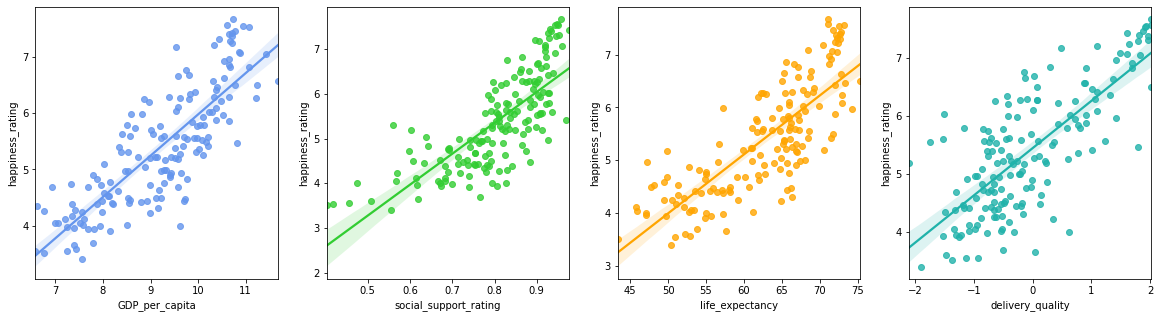

In [8]:

plt.rcParams['figure.figsize'] = [20,5]
fig, axs = plt.subplots(ncols=4)
sns.regplot(x='GDP_per_capita', y='happiness_rating', data=agg_df, ax=axs[0], color='cornflowerblue')
sns.regplot(x='social_support_rating', y='happiness_rating', data=agg_df, ax=axs[1], color='limegreen')
sns.regplot(x='life_expectancy',y='happiness_rating', data=agg_df, ax=axs[2], color='orange')
sns.regplot(x='delivery_quality',y='happiness_rating', data=agg_df, ax=axs[3], color='lightseagreen')



## 2019/2020 Comparison

In [9]:
data_comp = [['Denmark', 7.6930, 6.9032], ['Finland', 7.7803, 6.8528], ['India', 3.2488, 6.3174], ['US', 6.9437, 6.2356], ['Mexico', 6.4319, 6.8400], ['China', 5.1441, 5.1294], ['Saudi Arabia', 6.5612,6.1890], ['Malaysia', 5.4280, 6.1128]]
df_19_20 = pd.DataFrame(data_comp, columns = ['Country', '2019', '2020']) 


In [10]:
df_19_20['diff'] = df_19_20['2020'] - df_19_20['2019']

In [11]:
df_19_20.rename(columns={'Country':'country'}, inplace=True)
df_19_20

country    2019    2020    diff
0       Denmark  7.6930  6.9032 -0.7898
1       Finland  7.7803  6.8528 -0.9275
2         India  3.2488  6.3174  3.0686
3            US  6.9437  6.2356 -0.7081
4        Mexico  6.4319  6.8400  0.4081
5         China  5.1441  5.1294 -0.0147
6  Saudi Arabia  6.5612  6.1890 -0.3722
7      Malaysia  5.4280  6.1128  0.6848

In [12]:
df_19_20.to_csv('../data/exported_subset_data/for_visualizations/19_20_comp.csv')

In [13]:
df_19_20_comp = df_19_20.melt(id_vars = 'country',
                                    value_vars = ['2019','2020'],
                                    var_name = 'year',
                                    value_name = 'happiness')

Text(6.8, 6.6, '+ 3.069')

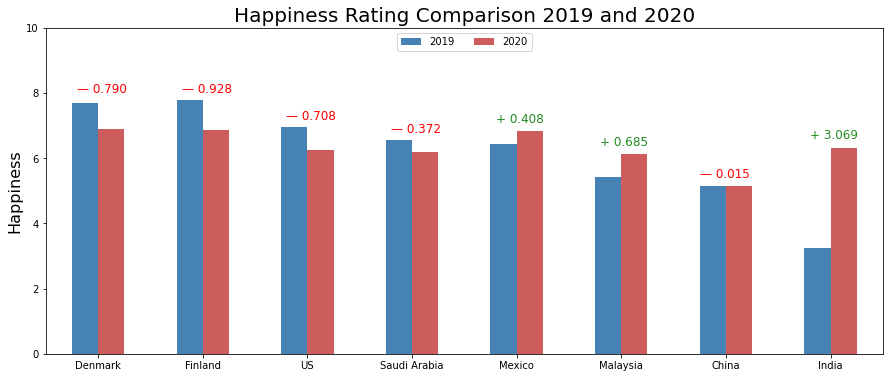

In [14]:
order=['Denmark','Finland','US','Saudi Arabia','Mexico','Malaysia','China','India']

df_19_20_comp.groupby(['country','year'])['happiness'].sum().unstack().loc[order].plot(kind='bar', color= ['steelblue', 'indianred',], figsize=(15,6))
plt.xlabel('')
plt.ylabel('Happiness', fontsize=16)
plt.ylim([0,10])
plt.legend(loc= 'upper center', ncol=2)
plt.xticks(rotation=0)
plt.title('Happiness Rating Comparison 2019 and 2020', fontsize=20)

plt.annotate('— 0.790', xy=(-0.2, 8), fontsize=12, color= 'red')
plt.annotate('— 0.928', xy=(0.8,8), fontsize=12, color= 'red')
plt.annotate('— 0.708', xy=(1.8,7.2), fontsize=12, color= 'red')
plt.annotate('— 0.372', xy=(2.8,6.8), fontsize=12, color= 'red')
plt.annotate('+ 0.408', xy=(3.8,7.1), fontsize=12, color='forestgreen')
plt.annotate('+ 0.685', xy=(4.8,6.4), fontsize=12, color='forestgreen')
plt.annotate('— 0.015', xy=(5.75,5.4), fontsize=12, color= 'red')
plt.annotate('+ 3.069', xy=(6.8,6.6), fontsize=12, color='forestgreen')

## Denmark Happiness vs. Cases

In [15]:
denmark_df_daily.drop(columns='date.1')
denmark_df_daily=denmark_df_daily.set_index(pd.to_datetime(denmark_df_daily['date']))
denmark_cov=denmark_cov.set_index(pd.to_datetime(denmark_cov['date']))

<AxesSubplot:label='db7508c9-b5d9-450c-9313-c8a14b02b8ea'>

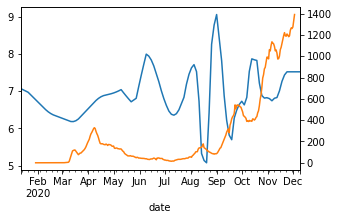

In [16]:
denmark_df_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
denmark_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## Finland Happiness vs. Cases

In [17]:
finland_df_daily.drop(columns='date.1')
finland_df_daily=finland_df_daily.set_index(pd.to_datetime(finland_df_daily['date']))
finland_cov=finland_cov.set_index(pd.to_datetime(finland_cov['date']))

<AxesSubplot:label='65016247-2570-481a-9b92-b69a1593faee'>

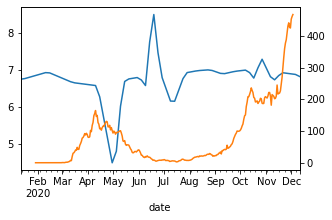

In [18]:
finland_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
finland_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## India Happiness vs. Cases

In [19]:
india_df_daily.drop(columns='date.1')
india_df_daily=india_df_daily.set_index(pd.to_datetime(india_df_daily['date']))
india_cov=india_cov.set_index(pd.to_datetime(india_cov['date']))

<AxesSubplot:label='1695ec33-5d59-43d8-9a58-4570a2cffbcf'>

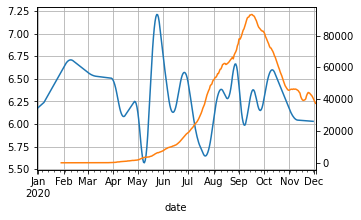

In [20]:
india_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
india_cov.rolling(7).mean()['daily_change'].plot(grid=True, secondary_y=True)


## US Happiness vs. Cases

In [21]:
ushap_daily.drop(columns='date.1')
ushap_daily=ushap_daily.set_index(pd.to_datetime(ushap_daily['date']))
us_cov=us_cov.set_index(pd.to_datetime(us_cov['date']))

<AxesSubplot:label='41825d65-c8f4-4b30-86cd-0a7866993fec'>

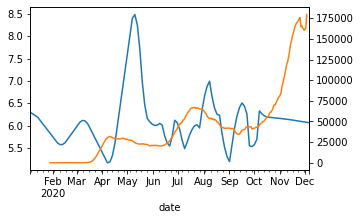

In [22]:
ushap_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
us_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## Mexico Happiness vs. Cases

In [23]:
mexico_df_daily.drop(columns='date.1')
mexico_df_daily=mexico_df_daily.set_index(pd.to_datetime(mexico_df_daily['date']))
mexico_cov=mexico_cov.set_index(pd.to_datetime(mexico_cov['date']))

<AxesSubplot:label='86060e73-ac97-4c5c-9263-304c1c0b785e'>

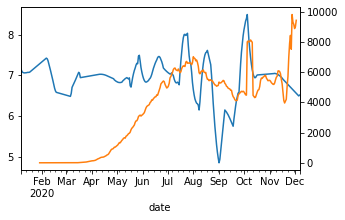

In [24]:
mexico_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
mexico_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## China Happiness vs. Cases

In [25]:
china_df_daily.drop(columns='date.1')
china_df_daily=china_df_daily.set_index(pd.to_datetime(china_df_daily['date']))
china_cov=china_cov.set_index(pd.to_datetime(china_cov['date']))

<AxesSubplot:label='ba527e8f-a956-4047-9fff-879f450c4af3'>

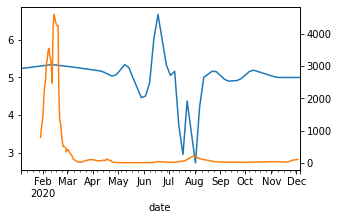

In [26]:
china_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
china_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## Saudi Arabia Happiness vs. Cases

In [27]:
sa_df_daily.drop(columns='date.1')
sa_df_daily=sa_df_daily.set_index(pd.to_datetime(sa_df_daily['date']))
sa_cov=sa_cov.set_index(pd.to_datetime(sa_cov['date']))

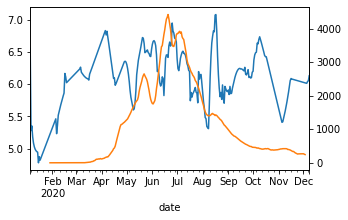

In [28]:
sa_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3));
ax7b=sa_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

## Malaysia Happiness vs. Cases

In [29]:
malaysia_df_daily.drop(columns='date.1')
malaysia_df_daily=malaysia_df_daily.set_index(pd.to_datetime(malaysia_df_daily['date']))
malaysia_cov=malaysia_cov.set_index(pd.to_datetime(malaysia_cov['date']))

<AxesSubplot:label='ca08c8fc-50d7-489c-a4d9-378bf73aa561'>

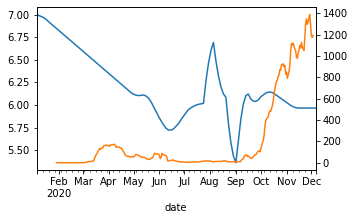

In [30]:
malaysia_df_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(figsize=(5,3))
malaysia_cov.rolling(7).mean()['daily_change'].plot(secondary_y=True)

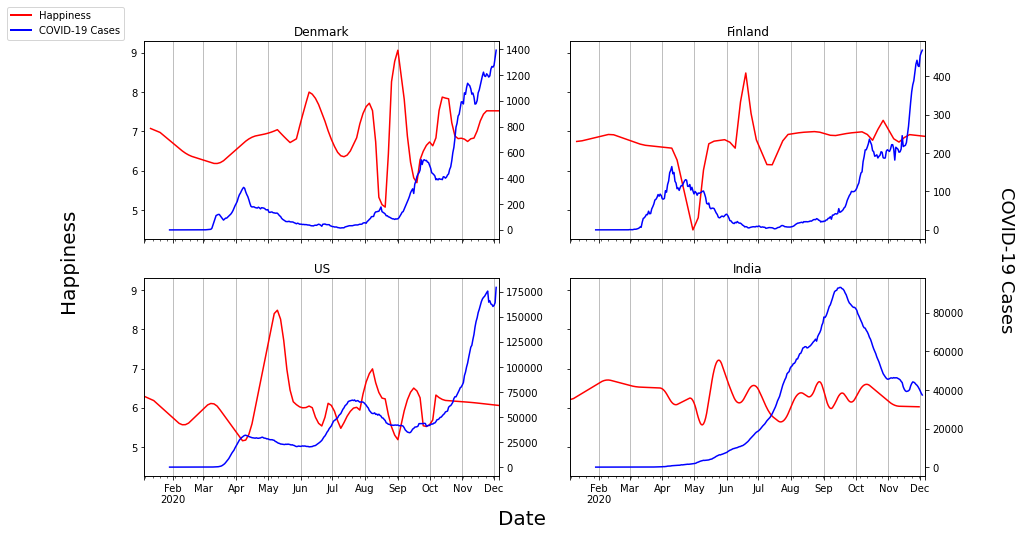

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8), sharex=True, sharey=True)

ax1a= denmark_df_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[0,0], color='red')
ax1b=denmark_cov.rolling(7).mean()['daily_change'].plot(ax=axes[0,0], secondary_y=True, color='blue')
plt.title('Denmark')
ax1a.xaxis.grid()

ax2a=finland_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[0,1], color='red')
ax2b=finland_cov.rolling(7).mean()['daily_change'].plot(ax=axes[0,1], secondary_y=True, color='blue')
plt.title('Finland');
ax2a.xaxis.grid()

ax3a=india_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[1,1], color='red');
ax3b=india_cov.rolling(7).mean()['daily_change'].plot(ax=axes[1,1], secondary_y=True, color='blue')
plt.title('India');
ax3a.set_xlabel('')
ax3a.xaxis.grid()

ax4a=ushap_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[1,0], color='red')
ax4b=us_cov.rolling(7).mean()['daily_change'].plot(ax=axes[1,0], secondary_y=True, color='blue')
plt.title('US');
ax4a.set_xlabel('')
ax4a.xaxis.grid()


plt.figtext(0.5,0.05, 'Date', ha='center', va='center', fontsize=20)
plt.figtext(0.05, 0.5, 'Happiness', ha='center', va='center', fontsize=20, rotation=90)
plt.figtext(0.98, 0.5, 'COVID-19 Cases', ha='center', va='center', fontsize=18, rotation=-90)


custom_lines= [Line2D([0],[0], color='red', lw=2, label='Happiness'),
               Line2D([0],[0], color='blue', lw=2, label='COVID-19 Cases')]
plt.legend(handles=custom_lines, loc='upper left', bbox_to_anchor=[-0.4,2.4])

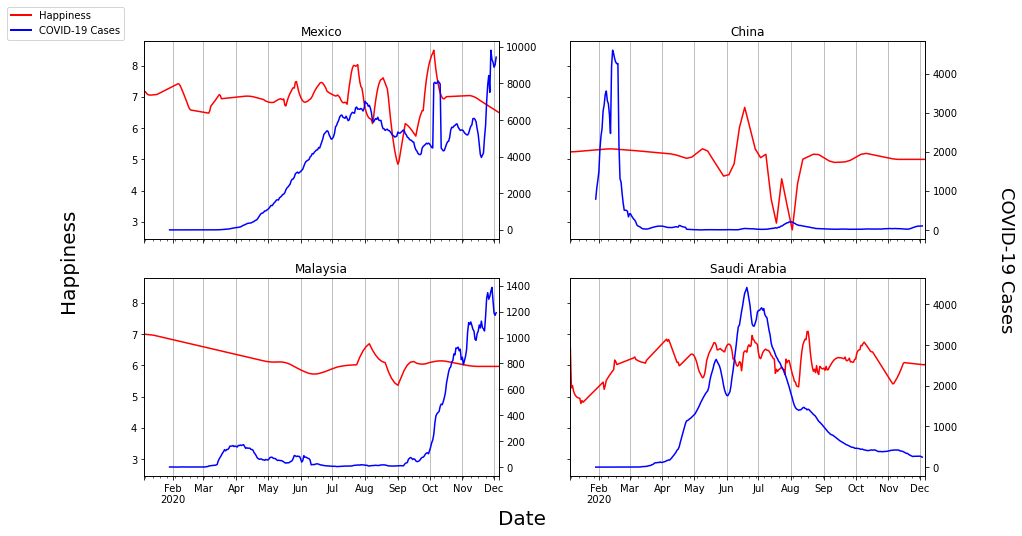

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8), sharex=True, sharey=True)

ax5a= mexico_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[0,0], color='red')
ax5b=mexico_cov.rolling(7).mean()['daily_change'].plot(ax=axes[0,0], secondary_y=True, color='blue')
plt.title('Mexico')
ax5a.xaxis.grid()

ax6a=china_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[0,1], color='red')
ax6b=china_cov.rolling(7).mean()['daily_change'].plot(ax=axes[0,1], secondary_y=True, color='blue')
plt.title('China');
ax6a.xaxis.grid()

ax7a=sa_df_daily.resample('D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[1,1], color='red');
ax7b=sa_cov.rolling(7).mean()['daily_change'].plot(ax=axes[1,1], secondary_y=True, color='blue')
plt.title('Saudi Arabia');
ax7a.set_xlabel('')
ax7a.xaxis.grid()

ax8a=malaysia_df_daily.resample('3D').interpolate().rolling('10D')['happiness_rating'].mean().plot(ax=axes[1,0], color='red')
ax8b=malaysia_cov.rolling(7).mean()['daily_change'].plot(ax=axes[1,0], secondary_y=True, color='blue')
plt.title('Malaysia');
ax8a.set_xlabel('')
ax8a.xaxis.grid()


plt.figtext(0.5,0.05, 'Date', ha='center', va='center', fontsize=20)
plt.figtext(0.05, 0.5, 'Happiness', ha='center', va='center', fontsize=20, rotation=90)
plt.figtext(0.98, 0.5, 'COVID-19 Cases', ha='center', va='center', fontsize=18, rotation=-90)


custom_lines= [Line2D([0],[0], color='red', lw=2, label='Happiness'),
               Line2D([0],[0], color='blue', lw=2, label='COVID-19 Cases')]
plt.legend(handles=custom_lines, loc='upper left', bbox_to_anchor=[-0.4,2.4])